<h1><center>Projet Integre : Kmeans sur des titres d'articles</center></h1>

In [1]:
%run kmeans_libraries.py # on charge toutes les librairies et fonctions qui ont été crées. 

In [2]:
# Chargement du dictionnaire tokénisé.
article_titles=load_dict("article_title_token_dict")
dict(list(article_titles.items())[0:3])

{'journals/nar/NakamuraGI98': ['codon',
  'usage',
  'tabulate',
  'dna',
  'sequence',
  'database'],
 'journals/prl/EvansLCD06': ['view',
  'synthesis',
  'depth',
  'motion',
  '3d',
  'ray',
  'image'],
 'journals/dm/KatonaQ93': ['large',
  'component',
  'random',
  'subgraph',
  'cycle']}

In [3]:
# Chargement du dictionnaire non tokénisé. 
article_titles_str=load_dict("article_titles_str_lst")
article_titles_str[0:3]

['codon usage tabulate dna sequence database',
 'view synthesis depth motion 3d ray image',
 'large component random subgraph cycle']

In [4]:
# Création d'un dataframe qui servira à assigner un topic pour chaque document. 
df_prediction=pd.DataFrame.from_dict(dict(zip(list(article_titles.keys()),article_titles_str)), orient='index',columns=['titre'])

In [5]:
vectorizer = CountVectorizer(min_df=5,ngram_range=(1,1))
documents_terms_matrix = vectorizer.fit_transform(article_titles_str)
dictionary = vectorizer.get_feature_names()    

transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(documents_terms_matrix)    # matrice tfidf

In [13]:
tfidf_matrix.shape

(394039, 17192)

In [6]:
n_clusters=0
i = 0

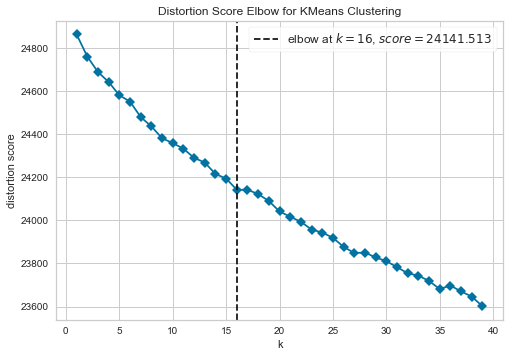

Wall time: 1h 6min 18s


In [77]:
%%time
n_clusters=n_clusters+elbow(model=KMeans(),min_k=1,max_k=40,matrix=tfidf_matrix[0:25000])
i=i+1# on travaille sur les 100 000 premiers documents
# fonction qui affiche la courbe permettant de trouver le point elbow et qui retourne ce dernier (il sera utilser comme le nombre de clusters à choisir dans l'algo des kmeans)

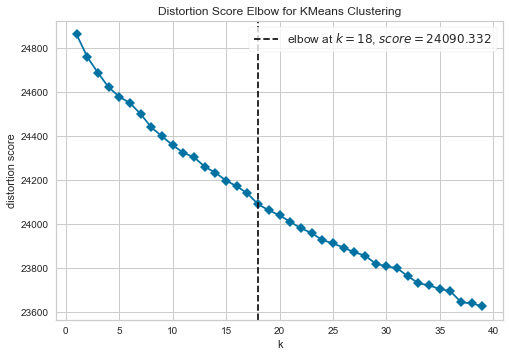

Wall time: 1h 8min 16s


In [78]:
%%time
n_clusters=n_clusters+elbow(model=KMeans(),min_k=1,max_k=40,matrix=tfidf_matrix[0:25000])
i=i+1# on travaille sur les 100 000 premiers documents
# fonction qui affiche la courbe permettant de trouver le point elbow et qui retourne ce dernier (il sera utilser comme le nombre de clusters à choisir dans l'algo des kmeans)

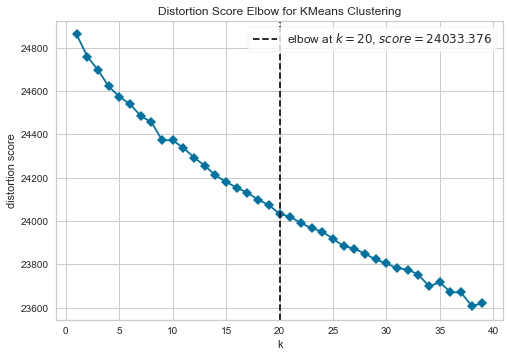

Wall time: 1h 6min 14s


In [7]:
%%time
n_clusters=n_clusters+elbow(model=KMeans(),min_k=1,max_k=40,matrix=tfidf_matrix[0:25000])
i=i+1# on travaille sur les 100 000 premiers documents
# fonction qui affiche la courbe permettant de trouver le point elbow et qui retourne ce dernier (il sera utilser comme le nombre de clusters à choisir dans l'algo des kmeans)

In [ ]:
print(int(n_clusters/i))

In [66]:
%%time
modelkmeans=KMeans(18)
modelkmeans.fit(tfidf_matrix)

Wall time: 19min 55s


In [67]:
#save_dict(modelkmeans,'modelkmeans_18')

In [44]:
modelkmeans=load_dict("modelkmeans_18")

In [45]:
modelkmeans.predict(tfidf_matrix)

array([ 4,  8,  4, ..., 13, 11,  4])

In [46]:
modelkmeans.labels_

array([ 4,  8,  4, ..., 13, 11,  4])

In [47]:
modelkmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 18,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [48]:
topics=get_topics(modelkmeans,dictionary,10) # Fonction qui va renvoyer un dictionnaire avec les mots caractérisant le plus un topic

In [49]:
topics

{'Cluster 0': 'analysis, performance, model, network, design, algorithm, system, image, component, approach',
 'Cluster 1': 'term, long, short, memory, forecasting, network, model, prediction, rewrite, equation',
 'Cluster 2': 'model, dynamic, approach, process, network, simulation, control, learn, image, algorithm',
 'Cluster 3': 'system, control, nonlinear, linear, distribute, multi, model, time, mimo, design',
 'Cluster 4': 'algorithm, approach, design, study, detection, new, function, program, high, dynamic',
 'Cluster 5': 'application, model, analysis, design, algorithm, system, data, fuzzy, method, mobile',
 'Cluster 6': 'problem, solve, algorithm, solution, method, optimization, approach, schedule, program, linear',
 'Cluster 7': 'time, control, real, adaptive, system, optimal, delay, space, dynamic, algorithm',
 'Cluster 8': 'learn, image, deep, machine, reinforcement, classification, segmentation, detection, approach, algorithm',
 'Cluster 9': 'network, wireless, sensor, rout,

In [50]:
modelkmeans.cluster_centers_.argsort()[:,::-1]

array([[  547, 11395,  9644, ...,  6457, 11510, 17191],
       [15536,  8755, 14091, ...,  9326,  9325, 17191],
       [ 9644,  4597,   747, ...,  8237,  8235, 16041],
       ...,
       [12813,  5454, 14560, ..., 10678, 10677,     0],
       [ 6428, 10620,  4682, ..., 10594, 10593,     0],
       [ 7553, 15321, 15453, ..., 13966,  7928, 14662]], dtype=int64)

In [51]:
df_prediction["label"]=modelkmeans.labels_ # on ajoute pour chaque document le topic qui a été prédit
df_prediction["description"]=""

lst = list(topics.values())
for i in range(len(lst)):
    df_prediction.loc[df_prediction.label==i,'description']=lst[i]

In [52]:
df_prediction

,titre,label,description
journals/nar/NakamuraGI98,codon usage tabulate dna sequence database,4,"algorithm, approach, design, study, detection, new, function, program, high, dynamic"
journals/prl/EvansLCD06,view synthesis depth motion 3d ray image,8,"learn, image, deep, machine, reinforcement, classification, segmentation, detection, approach, algorithm"
journals/dm/KatonaQ93,large component random subgraph cycle,4,"algorithm, approach, design, study, detection, new, function, program, high, dynamic"
journals/cor/LabbeLS98,cover graph cycle,16,"graph, number, edge, color, algorithm, planar, random, bipartite, vertex, cycle"
journals/ita/GaibissoGT90,partially persistent data structure set union problem,6,"problem, solve, algorithm, solution, method, optimization, approach, schedule, program, linear"
...,...,...,...
journals/information/SpurTDMC20,explore multiple coordinate view multilayered geospatial data virtual reality,12,"data, big, analysis, mining, model, approach, learn, driven, network, cluster"
journals/tcas/LaxminidhiPP09,widely programmable high frequency active,4,"algorithm, approach, design, study, detection, new, function, program, high, dynamic"
journals/jcc/KamierkiewiczLS02,energy reconstruction protein backbone carbon trace monte carlo method,13,"method, equation, new, analysis, image, finite, model, novel, element, system"
journals/asc/WuCYC18,improve water flow like algorithm order acceptance schedule identical parallel machine,11,"flow, network, model, method, shop, problem, traffic, control, optical, fluid"


In [56]:
unique, frequency = np.unique(modelkmeans.labels_,return_counts = True)

In [57]:
frequency

array([ 15415,   1674,  20305,  17123, 187528,  11619,  11593,  15690,
        20726,  22151,   5152,   3828,  14758,  13696,   8641,   5041,
         8789,  10310], dtype=int64)

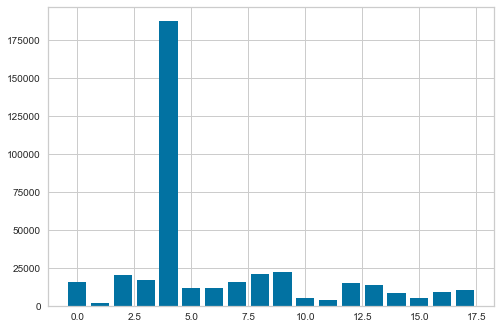

In [63]:
c=plt.figure()
plt.bar(unique,frequency)
mpld3.fig_to_html(c)
mpld3.save_html(c,'bar_kmeans.html')

In [9]:
tsvd = TruncatedSVD(n_components=2)
reduced_data = tsvd.fit_transform(tfidf_matrix) # = df

In [10]:
save_dict(reduced_data,'reduced_data')

In [11]:
reduced_data=load_dict('reduced_data')

In [12]:
model=KMeans(n_clusters=18)
model.fit(reduced_data)
labels=model.predict(reduced_data)

In [13]:
#save_dict(model,'reduced_kmeans')

In [14]:
model=load_dict('reduced_kmeans')

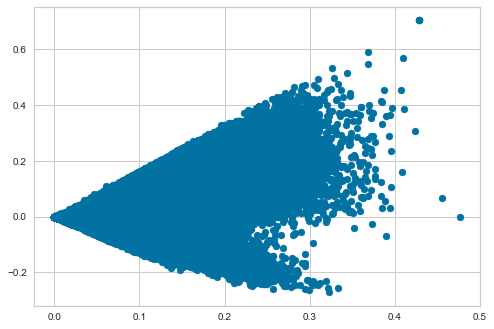

In [64]:
c=plt.figure()
plt.scatter(reduced_data[:,0],reduced_data[:,1])
mpld3.fig_to_html(c)
mpld3.save_html(c,'reduced_data_before_clustering.html')

<BarContainer object of 18 artists>

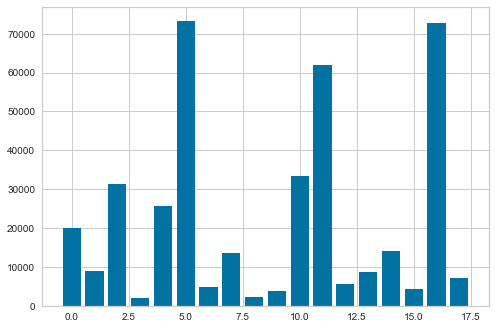

In [43]:
unique, frequency = np.unique(labels,return_counts = True)
plt.bar(unique,frequency)

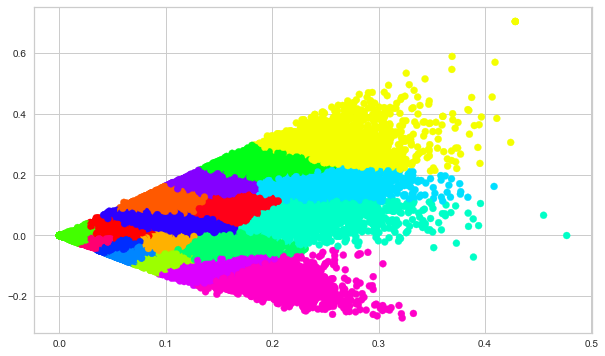

In [37]:
cmap = plt.cm.get_cmap("hsv", model.cluster_centers_.shape[0])
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

colors = [cmap(i) for i in model.labels_]
ax.legend(np.unique(labels))
ax.scatter(reduced_data[:,0], reduced_data[:,1], c=colors)

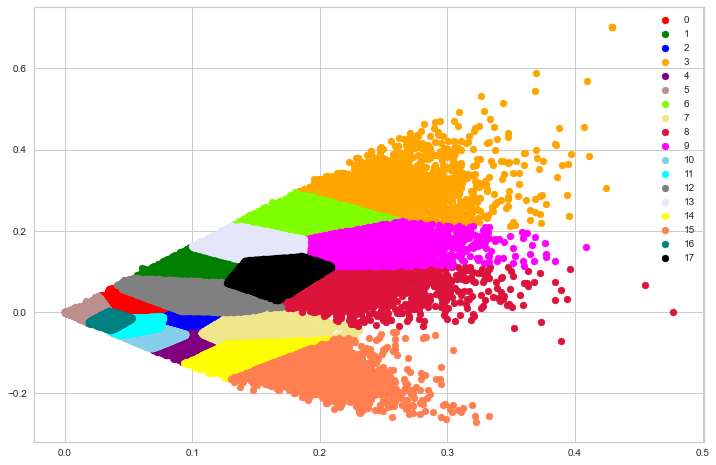

In [41]:
label=model.labels_
colors = {0:'red',1:'green',2:'blue',3:'orange',4:'purple',5:'rosybrown',6:'chartreuse',7:'khaki',8:'crimson',9:'fuchsia',10:'skyblue',11:'aqua',12:'gray',13:'lavender',14:'yellow',15:'coral',16:'teal',17:'black'}

u_labels = np.unique(label)
fig=plt.figure(figsize=(12,8))
for i in u_labels:
    plt.scatter(reduced_data[label == i , 0] , reduced_data[label == i , 1] , label = i,color=colors[i])
plt.legend()
plt.show()

In [115]:
topics=get_topics(model,dictionary,10) # Fonction qui va renvoyer un dictionnaire avec les mots caractérisant le plus un topic

In [118]:
topics=get_topics(model,dictionary,10) # Fonction qui va renvoyer un dictionnaire avec les mots caractérisant le plus un topic
# Création d'un dataframe qui servira à assigner un topic pour chaque document. 
df_prediction2=pd.DataFrame.from_dict(dict(zip(list(article_titles.keys()),article_titles_str)), orient='index',columns=['titre'])


df_prediction2["label"]=label # on ajoute pour chaque document le topic qui a été prédit
df_prediction2["description"]=""

lst = list(topics.values())
for i in range(len(lst)):
    df_prediction2.loc[df_prediction2.label==i,'description']=lst[i]

In [117]:
list(df_prediction2["titre"][df_prediction["label"]==0])[0:20] # analysis

['analysis design integrate controller precise motion system',
 'cellular automaton feedback mechanism strengthen biological sequence analysis approach robotic soccer',
 'forensic cell site analysis validation error mitigation methodology',
 'equilibrium dynamic ice stream bayesian statistical analysis',
 'texture analysis anno',
 'effect lactate early visual cortex non human investigate pharmaco mri neurochemical analysis',
 'temperature centric reliability analysis optimization electronic system process variation',
 'anamir integrate analysis microrna gene expression profile',
 'provably secure concurrent error detection differential fault analysis',
 'power allocation game interference relay channel existence analysis nash equilibrium',
 'dynamic analysis interplay asynchronous synchronous communication online learn impact motivation',
 'design evaluation genomics variant analysis pipeline gatk spark tool',
 'spectral analysis randomly sample signal suppression aliasing sampler jitt